In [63]:
import sys
sys.path.append('..') # parent directory

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from LinearRegression import MyLinearRegression
from sklearn.linear_model import LinearRegression
from metrics import rmse, r2_score

In [64]:
# scatter plot points 
def scatter_plot(x, y):
    plt.scatter(x, y, s=10)
    plt.xlabel('x')
    plt.ylabel('y')

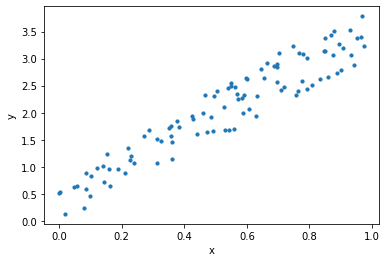

In [65]:
# generate a random dataset of points, they should lie close to a line
x = np.random.rand(100, 1)
# visual changes when changing the coefficient of x
y = 3 * x + np.random.rand(100, 1) 
scatter_plot(x, y)

In [66]:
# first, test MyLinearRegression

# initialise the model
my_regression_model = MyLinearRegression()
# add x0 = 1 to each of the feature vectors
m = x.shape[0]
x_train = np.c_[np.ones((m,1)), x]
# fit the data
my_regression_model.fit(x_train, y)
# predict
my_y_predict = my_regression_model.predict(x_train)

In [67]:
# now compare with the scikit-learn LinearRegression 

# initialise the model
regression_model = LinearRegression()
# fit the data
regression_model.fit(x, y)
# predict y coordinates from x coordinates
y_predict = regression_model.predict(x)

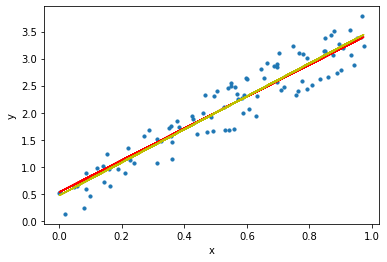

In [68]:
# data points
scatter_plot(x, y)
# predicted values
plt.plot(x, my_y_predict, color='r')
plt.plot(x, y_predict, color='y')

In [69]:
# evaluate MyLinearRegression
coefficient = my_regression_model.model_params[1]
intercept = my_regression_model.model_params[0]
rmse_ = rmse(my_y_predict, y, m)
r2_ = r2_score(my_y_predict, y)

print("MyLinearRegression")
print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")
print(f"RMSE: {rmse_}")
print(f"R2-score: {r2_}")

MyLinearRegression
Coefficient: [2.94527727]
Intercept: [0.52963001]
RMSE: 0.27695410985033847
R2-score: 0.9034659073923491


In [70]:
# compare with evaluation for sklearn LinearRegression
coefficient = regression_model.coef_
intercept = regression_model.intercept_
rmse_ = rmse(y_predict, y, m)
r2_ = r2_score(y_predict, y)

print("sklearn LinearRegression")
print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")
print(f"RMSE: {rmse_}")
print(f"R2-score: {r2_}")

sklearn LinearRegression
Coefficient: [[3.0532522]]
Intercept: [0.46899797]
RMSE: 0.27530285843082536
R2-score: 0.904613583917684


(40,)
(40,)
(40, 2)
(40, 1)


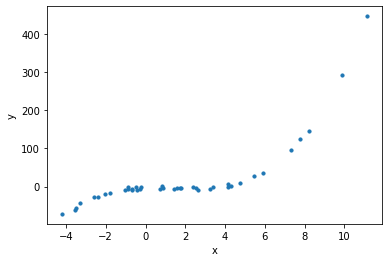

In [71]:
# now test MyLinearRegression on some non linear data
m = 40 # change this
x = 2 - 3 * np.random.normal(0, 1, m)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, m)
scatter_plot(x, y)
print(x.shape)
print(y.shape)
# need to give x and y a new axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
# and add x0 = 1 to the feature vectors
x_train = np.c_[np.ones((m,1)), x]
print(x_train.shape)
print(y.shape)

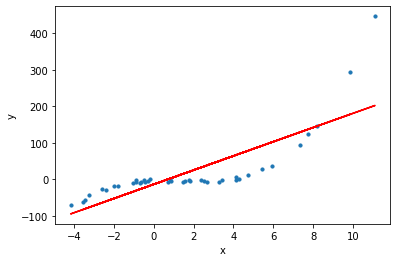

In [72]:
# fit the data
my_regression_model.fit(x_train, y)
# predict
my_y_predict = my_regression_model.predict(x_train)

# plot
scatter_plot(x, y)
plt.plot(x, my_y_predict, color='r')

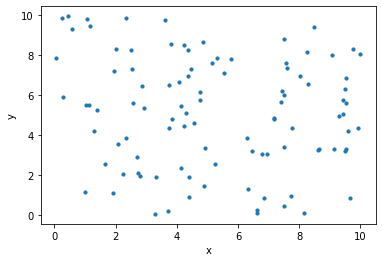

In [73]:
# now test MyLinearRegression on some very random data

m = 100 # change this
x = 10 * np.random.rand(m, 1)
y = 10 * np.random.rand(m, 1)
scatter_plot(x, y)
# and add x0 = 1 to the feature vectors
x_train = np.c_[np.ones((m,1)), x]

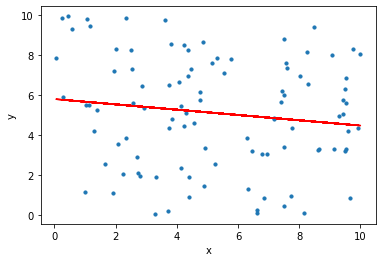

In [74]:
# fit the data
my_regression_model.fit(x_train, y)
# predict
my_y_predict = my_regression_model.predict(x_train)

# plot
scatter_plot(x, y)
plt.plot(x, my_y_predict, color='r')